Code block catalog

1.   28\*28 to 7\*7
2.   plot
3.   tensorflow_hidden_layers*2
4.   tensorflow_hidden_layers*1
5.   tensorflow_hidden_layers*3
6.   sklearn


In [3]:
#28*28 to 7*7

#下载mnist数据集
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# x_train=x_train.reshape(60000,784)
# x_test=x_test.reshape(10000,784)

# ----------------28*28 to 7*7----------------
import numpy
x_train1= numpy.zeros(shape=(60000,49))
x_test1=numpy.zeros(shape=(10000,49))
i=0
for i in range(60000):
    j=0
    m=0
    n=0
#     print ('i=',i)
    for m in range (0,27,4):
        n=0
#         print('m=',m)
        for  n in range (0,27,4):
            x_train1[i][j]=(x_train[i][m][n]+x_train[i][m][n+1]+x_train[i][m][n+2]+x_train[i][m][n+3]+x_train[i][m+1][n]+x_train[i][m+1][n+1]+x_train[i][m+1][n+2]+x_train[i][m+1][n+3]+x_train[i][m+2][n]+x_train[i][m+2][n+1]+x_train[i][m+2][n+2]+x_train[i][m+2][n+3]+x_train[i][m+3][n]+x_train[i][m+3][n+1]+x_train[i][m+3][n+2]+x_train[i][m+3][n+3])/16
#             print ('n=',n)
#             print ('j=',j)
            j=j+1
            
            

x_train1=x_train1.reshape(60000,49)

i=0
for i in range(10000):
    j=0
    m=0
    n=0
    for m in range (0,27,4):
        n=0
        for  n in range (0,27,4):
            x_test1[i][j]=(x_test[i][m][n]+x_test[i][m][n+1]+x_test[i][m][n+2]+x_test[i][m][n+3]+x_test[i][m+1][n]+x_test[i][m+1][n+1]+x_test[i][m+1][n+2]+x_test[i][m+1][n+3]+x_test[i][m+2][n]+x_test[i][m+2][n+1]+x_test[i][m+2][n+2]+x_test[i][m+2][n+3]+x_test[i][m+3][n]+x_test[i][m+3][n+1]+x_test[i][m+3][n+2]+x_test[i][m+3][n+3])/16
            j=j+1

x_test1=x_test1.reshape(10000,49)
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
print("finish")
# print(x_test1.shape)
# print(x_train1.shape)
# print(x_train1[0])
# print (x_train[0])
#------------------plot--------------------
# import matplotlib.pyplot as plt
# plt.subplot(321)
# plt.imshow(x_train1[0],cmap=plt.get_cmap('gray'))
# plt.subplot(322)
# plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))
# plt.subplot(323)
# plt.imshow(x_train1[6],cmap=plt.get_cmap('gray'))
# plt.subplot(324)
# plt.imshow(x_train[6],cmap=plt.get_cmap('gray'))
# plt.subplot(325)
# plt.imshow(x_train1[59999],cmap=plt.get_cmap('gray'))
# plt.subplot(326)
# plt.imshow(x_train[59999],cmap=plt.get_cmap('gray'))
# plt.show()



finish


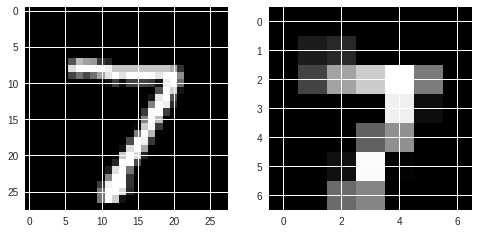

In [0]:
# -------------plot-----------------
x_test1=x_test1.reshape(10000,7,7)
x_test=x_test.reshape(10000,28,28)
x_test1[0]

import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(x_test[0],cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(x_test1[0],cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
x_train1[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0120098 , 0.32132354,
       0.48970592, 0.50122553, 0.4230392 , 0.        , 0.        ,
       0.00441176, 0.4612745 , 0.52524507, 0.16789216, 0.        ,
       0.        , 0.        , 0.        , 0.00269608, 0.48504901,
       0.29142156, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.21102941, 0.82598042, 0.01617647, 0.        ,
       0.        , 0.21936274, 0.65539217, 0.64166671, 0.1507353 ,
       0.        , 0.        , 0.        , 0.21936277, 0.12132353,
       0.        , 0.        , 0.        , 0.        ])

In [0]:
x_test1=x_test1.reshape(10000,49)
x_train1=x_train1.reshape(60000,49)


In [0]:
# --------------tensorflow_hidden_layers*2---------------
import tensorflow as tf
import numpy as np
import datetime

#label one_hot
a = np.array(y_train)
n_class = a.max() + 1
y_train1=np.eye(n_class)[a]

a = np.array(y_test)
n_class = a.max() + 1
y_test1=np.eye(n_class)[a]

# next_batch for new train_data
def next_batch(num, data, labels):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

#定义一些参数
learning_rate = 0.005
train_epochs = 10
batch_size = 64

#定义3层感知机的神经单元个数
n_input = 49
n_hidden1 =20
n_hidden2 = 20
n_classes = 10

#定义网络输入参数占位符
x = tf.placeholder(tf.float32, shape=[None, n_input])
y = tf.placeholder(tf.float32, shape=[None, n_classes])

#定义权重与偏置
weights = {'h1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
                  'h2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
                  'out': tf.Variable(tf.random_normal([n_hidden2, n_classes]))}

biases = {'b1': tf.Variable(tf.random_normal([n_hidden1])),
                'b2': tf.Variable(tf.random_normal([n_hidden2])),
                'out': tf.Variable(tf.random_normal([n_classes]))}


#定义推断过程
def inference(input_x):
    layer_1 = tf.nn.relu(tf.matmul(x, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

#构建网络
logits = inference(x)
prediction = tf.nn.softmax(logits)

#定义损失函数与优化器
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

#定义评价指标(准确度)
pre_correct = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1))
accuracy = tf.reduce_mean(tf.cast(pre_correct, tf.float32))

#初始化所有变量
init = tf.global_variables_initializer()

#strat time
start_time=datetime.datetime.now()
print('\n Start training! \n')

#开始训练
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(60000 / batch_size)

    for epoch in range(train_epochs):
        for batch in range(total_batch):
            batch_x, batch_y = next_batch(batch_size,x_train1,y_train1)
            sess.run(train_op, feed_dict={x:batch_x, y:batch_y})

        if epoch % 10 == 0:
            loss_, acc = sess.run([loss, accuracy], feed_dict={x:batch_x, y:batch_y})
            print("epoch {},  loss {:.4f}, acc {:.3f}".format(epoch, loss_, acc))

    print("optimizer finished!")
    

    #计算测试集的准确度 
    test_acc = sess.run(accuracy, feed_dict={x:x_test1, y:y_test1})
    print('test accuracy', test_acc)
    
    finish_time = datetime.datetime.now()
    print ('\n finish training! \n')
    print ('\n the duration is : %s \n'%(str(finish_time-start_time)))


 Start training! 

epoch 0,  loss 0.2890, acc 0.922
optimizer finished!
test accuracy 0.9396

 finish training! 


 the duration is : 0:00:33.675913 



In [0]:
# -------------------tensorflow_hidden_layers*1---------------------
import tensorflow as tf
import numpy as np
import datetime

#label one_hot
a = np.array(y_train)
n_class = a.max() + 1
y_train1=np.eye(n_class)[a]

a = np.array(y_test)
n_class = a.max() + 1
y_test1=np.eye(n_class)[a]

# next_batch for new train_data
def next_batch(num, data, labels):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

#定义一些参数
learning_rate = 0.005
train_epochs = 10
batch_size = 64

#定义3层感知机的神经单元个数
n_input = 49
n_hidden1 = 20
# n_hidden2 = 100
n_classes = 10

#定义网络输入参数占位符
x = tf.placeholder(tf.float32, shape=[None, n_input])
y = tf.placeholder(tf.float32, shape=[None, n_classes])

#定义权重与偏置
weights = {'h1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
#                   'h2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
                  'out': tf.Variable(tf.random_normal([n_hidden1, n_classes]))}

biases = {'b1': tf.Variable(tf.random_normal([n_hidden1])),
#                 'b2': tf.Variable(tf.random_normal([n_hidden2])),
                'out': tf.Variable(tf.random_normal([n_classes]))}


#定义推断过程
def inference(input_x):
    layer_1 = tf.nn.relu(tf.matmul(x, weights['h1']) + biases['b1'])
#     layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

#构建网络
logits = inference(x)
prediction = tf.nn.softmax(logits)

#定义损失函数与优化器
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

#定义评价指标(准确度)
pre_correct = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1))
accuracy = tf.reduce_mean(tf.cast(pre_correct, tf.float32))

#初始化所有变量
init = tf.global_variables_initializer()

#strat time
start_time=datetime.datetime.now()
print('\n Start training! \n')

#开始训练
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(60000 / batch_size)

    for epoch in range(train_epochs):
        for batch in range(total_batch):
            batch_x, batch_y = next_batch(batch_size,x_train1,y_train1)
            sess.run(train_op, feed_dict={x:batch_x, y:batch_y})

        if epoch % 10 == 0:
            loss_, acc = sess.run([loss, accuracy], feed_dict={x:batch_x, y:batch_y})
            print("epoch {},  loss {:.4f}, acc {:.3f}".format(epoch, loss_, acc))

    print("optimizer finished!")
    

    #计算测试集的准确度 
    test_acc = sess.run(accuracy, feed_dict={x:x_test1, y:y_test1})
    print('test accuracy', test_acc)
    
    finish_time = datetime.datetime.now()
    print ('\n finish training! \n')
    print ('\n the duration is : %s \n'%(str(finish_time-start_time)))


 Start training! 

epoch 0,  loss 0.2716, acc 0.891
optimizer finished!
test accuracy 0.9366

 finish training! 


 the duration is : 0:00:32.101555 



In [0]:
# -----tensorflow_hidden_layers*3--------------
import tensorflow as tf
import numpy as np
import datetime

#label one_hot
a = np.array(y_train)
n_class = a.max() + 1
y_train1=np.eye(n_class)[a]

a = np.array(y_test)
n_class = a.max() + 1
y_test1=np.eye(n_class)[a]

# next_batch for new train_data
def next_batch(num, data, labels):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

#定义一些参数
learning_rate = 0.005
train_epochs = 10
batch_size = 64

#定义3层感知机的神经单元个数
n_input = 49
n_hidden1 =400
n_hidden2 = 400
n_hidden3 = 400
n_classes = 10

#定义网络输入参数占位符
x = tf.placeholder(tf.float32, shape=[None, n_input])
y = tf.placeholder(tf.float32, shape=[None, n_classes])

#定义权重与偏置
weights = {'h1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
                  'h2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
                  'h3': tf.Variable(tf.random_normal([n_hidden2,n_hidden3])),
                  'out': tf.Variable(tf.random_normal([n_hidden3, n_classes]))}

biases = {'b1': tf.Variable(tf.random_normal([n_hidden1])),
                'b2': tf.Variable(tf.random_normal([n_hidden2])),
                'b3': tf.Variable(tf.random_normal([n_hidden3])),
                'out': tf.Variable(tf.random_normal([n_classes]))}


#定义推断过程
def inference(input_x):
    layer_1 = tf.nn.relu(tf.matmul(x, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.relu(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer

#构建网络
logits = inference(x)
prediction = tf.nn.softmax(logits)

#定义损失函数与优化器
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

#定义评价指标(准确度)
pre_correct = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1))
accuracy = tf.reduce_mean(tf.cast(pre_correct, tf.float32))

#初始化所有变量
init = tf.global_variables_initializer()

#strat time
start_time=datetime.datetime.now()
print('\n Start training! \n')

#开始训练
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(60000 / batch_size)

    for epoch in range(train_epochs):
        for batch in range(total_batch):
            batch_x, batch_y = next_batch(batch_size,x_train1,y_train1)
            sess.run(train_op, feed_dict={x:batch_x, y:batch_y})

        if epoch % 10 == 0:
            loss_, acc = sess.run([loss, accuracy], feed_dict={x:batch_x, y:batch_y})
            print("epoch {},  loss {:.4f}, acc {:.3f}".format(epoch, loss_, acc))

    print("optimizer finished!")
    

    #计算测试集的准确度 
    test_acc = sess.run(accuracy, feed_dict={x:x_test1, y:y_test1})
    print('test accuracy', test_acc)
    
    finish_time = datetime.datetime.now()
    print ('\n finish training! \n')
    print ('\n the duration is : %s \n'%(str(finish_time-start_time)))


 Start training! 

epoch 0,  loss 52.1454, acc 0.953
optimizer finished!
test accuracy 0.9467

 finish training! 


 the duration is : 0:00:40.141192 



In [11]:
# --------------sklearn-----------------
import numpy as np
import pandas as pd
import datetime
from sklearn.neural_network import MLPRegressor

#from keras.datasets import mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MLPRegressor(activation='relu', alpha=1e-10, batch_size='auto', beta_1=0.9,
#       beta_2=0.999, early_stopping=False, epsilon=1e-08,
#       hidden_layer_sizes=(10, 10), learning_rate='constant',
#       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
#       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
#       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
#       warm_start=False)


x_train1=x_train1.reshape(60000,49)
x_test1=x_test1.reshape(10000,49)

rgs1 = MLPRegressor(activation='relu',solver = 'lbfgs', alpha = 1e-10, hidden_layer_sizes = (80,80), random_state = 1, max_iter = 80, learning_rate='constant', learning_rate_init=0.001)
#                    
                    

start_time = datetime.datetime.now()
print('\n Start Reading! \n')

rgs1.fit(x_train1, y_train)

y1_ANN = rgs1.predict(x_test1)

finish_time = datetime.datetime.now()
print('\n Finish Reading! \n')
print('Reading from %s to %s'%(start_time,finish_time))
print('\n The duration is: %s \n'%(str(finish_time-start_time)))

# y1_round=numpy.zeros(shape=(10000,))

for n in range (10000):
     if y1_ANN[n] > 9:
          y1_ANN[n]=9
          y1_round = np.round(y1_ANN)

acc1 = 1 - np.round(sum(np.abs(y1_round - y_test)/len(y1_round)),4)
print('The Accuracy is:', acc1)




 Start Reading! 


 Finish Reading! 

Reading from 2019-03-10 15:17:47.377623 to 2019-03-10 15:18:19.029328

 The duration is: 0:00:31.651705 

The Accuracy is: 0.28090000000000004
